In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

# Define the feature and label for the data
X = train_data[['question1', 'question2']].apply(lambda x: ' '.join(x), axis=1)
y = train_data['is_duplicate']

In [6]:
# Convert the text into TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [7]:
# Initialize an empty list to store the train and test scores
train_scores = []
test_scores = []

# Train a random forest classifier for multiple epochs
for epoch in range(10):
    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Calculate the train and test scores
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)

    # Append the train and test scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

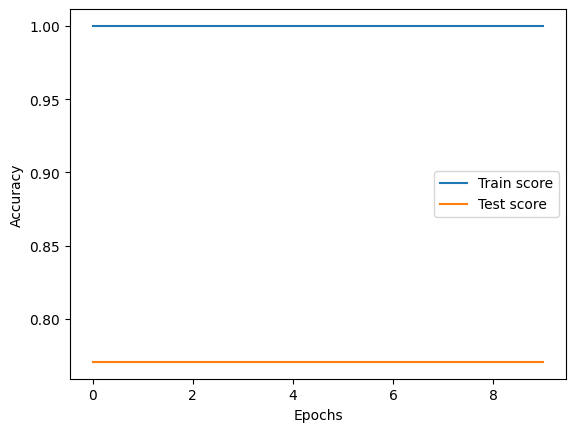

In [8]:
# Plot the train and test scores against the number of training examples
plt.plot(range(10), train_scores, label='Train score')
plt.plot(range(10), test_scores, label='Test score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Load the data
data = pd.read_csv('train.csv', nrows=100000)

# Define the feature extractor using TfidfVectorizer
vectorizer = TfidfVectorizer()

# Extract the features from the text
X = vectorizer.fit_transform(data['question1'] + ' ' + data['question2'])
y = data['is_duplicate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Get the predicted labels on the test set
y_pred = rfc.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7708
Precision: 0.7759134973900075
Recall: 0.5516967126193001
F1 Score: 0.6448713975828942


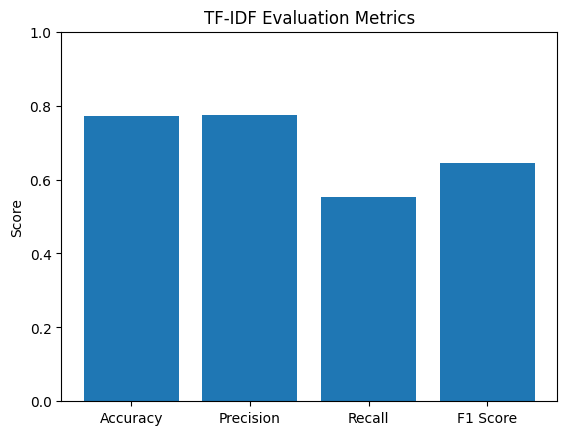

In [12]:
# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1])
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('TF-IDF Evaluation Metrics')
plt.show()

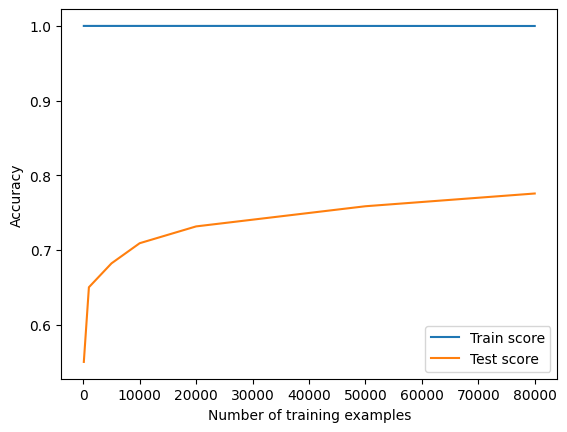

In [13]:
# Initialize an empty list to store the train and test scores
train_scores = []
test_scores = []

# Define a list of different subset sizes to use for training the model
subset_sizes = [100, 1000, 5000, 10000, 20000, 50000, 80000]

# Train a random forest classifier on different subsets of the training data
for subset_size in subset_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(train_data[['question1', 'question2']][:subset_size], y[:subset_size], test_size=0.2, random_state=42)

    # Initialize a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the training data
    tfidf_vectorizer.fit(pd.concat([X_train['question1'], X_train['question2']]))

    # Transform the training and testing data
    X_train_tfidf = tfidf_vectorizer.transform(X_train['question1']) + tfidf_vectorizer.transform(X_train['question2'])
    X_test_tfidf = tfidf_vectorizer.transform(X_test['question1']) + tfidf_vectorizer.transform(X_test['question2'])

    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_tfidf, y_train)

    # Calculate the train and test scores
    train_score = rf.score(X_train_tfidf, y_train)
    test_score = rf.score(X_test_tfidf, y_test)

    # Append the train and test scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the train and test scores against the number of training examples
plt.plot(subset_sizes, train_scores, label='Train score')
plt.plot(subset_sizes, test_scores, label='Test score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()